In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv("/content/drive/MyDrive/ML_project/heart_attack_prediction_dataset.csv")

In [7]:
df = data.copy()

In [8]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

<h1>Initial Observation</h1>
<p>We have 26 columns (25 features & 1 class) to work with.<br>As we are predicting heart attack risk, we select Heart Attack Risk as our class column.<br>Because Heart Attack Risk only consists of 0 & 1, this is a classification problem.<br>Our dataset consists of both Categorical & Quantitive features.</p>

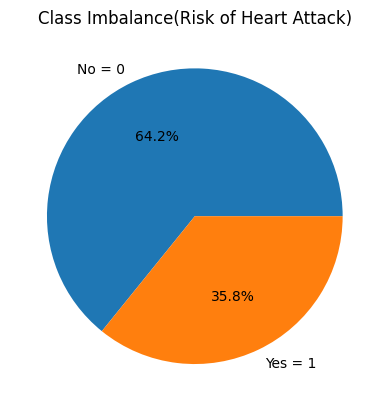

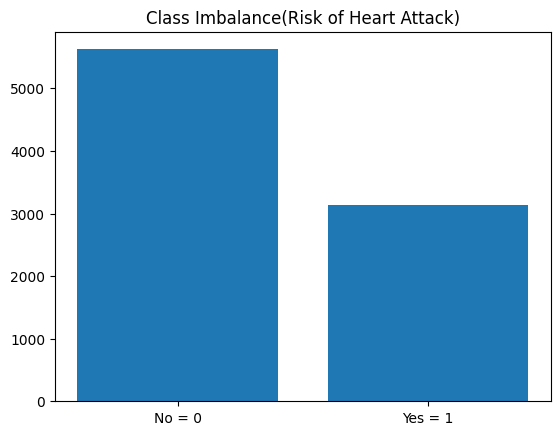

In [10]:
labels = ["No = 0", "Yes = 1"]

values = df["Heart Attack Risk"].value_counts().to_numpy()

plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

plt.bar(x = labels, height = values)
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

<p>As we can see, class imbalance is present in the dataset</p>

<h1>Data Pre-processing</h1>

<h2> Handling Null Values </h2>

In [11]:
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

<p>No Null value present in the current dataset</p>

<h2>Spliting Blood Pressure</h2>

In [12]:
#str = 180/120 = ["180", "120"]
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [13]:
df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'])
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'])

In [14]:
df.drop(['Blood Pressure'], axis=1, inplace=True)
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


<h2>Encoding</h2>

In [15]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder = LabelEncoder()

In [18]:
for col_name in df.columns:

    if df[col_name].dtype == "object":
        df[col_name] = encoder.fit_transform(df[[col_name]])

In [19]:
df.dtypes

Patient ID                           int64
Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                              int64
Continent                            int64
Hemisphere 

In [20]:
df= df.drop(['Patient ID' , 'Country' , 'Continent' , 'Hemisphere' , 'Income' , 'Family History'],axis=True)
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,1,208,72,0,1,0,0,4.168189,0,...,0,9,6.615001,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1.813242,2,...,0,1,4.963459,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,2.078353,1,...,1,9,9.463426,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,0,1,9.828130,0,...,0,9,7.648981,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,0,5.804299,2,...,0,6,1.514821,21.809144,231,1,5,0,91,88


<h2>Correlation Matrix</h2>

In [21]:
df.shape

(8763, 21)

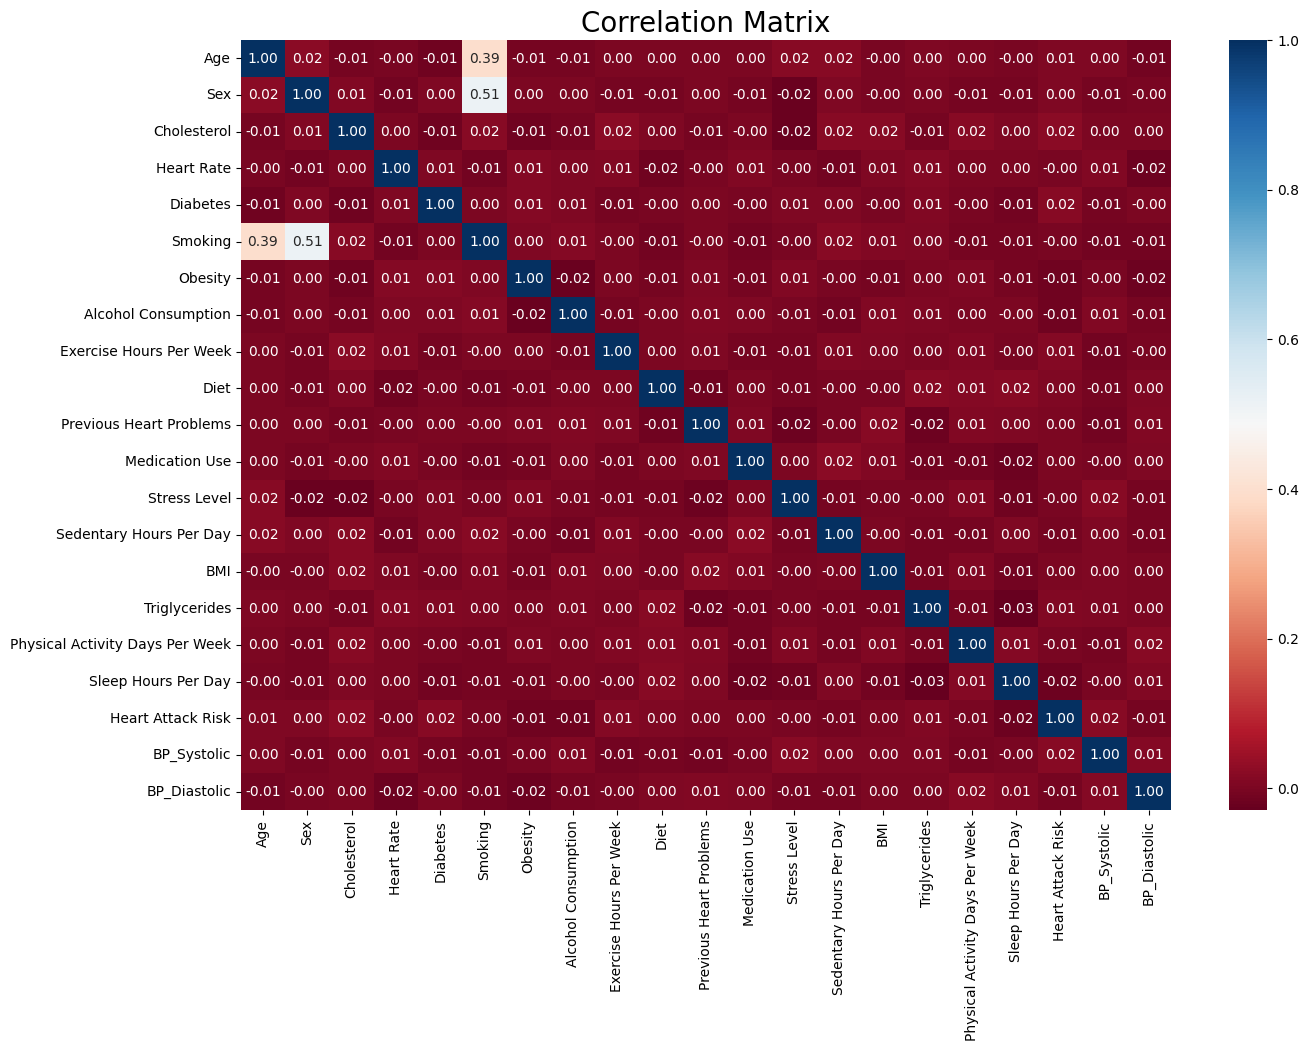

In [22]:
plt.figure(figsize=(15,10))
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(df.corr(), annot=True, cmap="RdBu", fmt=".2f")
plt.show()

<ul>
<h5>Key Findings</h5>
<li>Heart Attack risk has highest correlation with Diabetes, Cholestrol and Exercise Hours Per Weak</li>
<li>Heart attack Risk is not much dependent on Sedentary Hours Per Day</li>
<li>Alcohol Consumption has no stronger link with Heart Attack Risk</li>
<li>Smoking is not a major cause of Heart Attack</li>
</ul>

In [23]:
X = df.drop("Heart Attack Risk",axis = 1)
y = df["Heart Attack Risk"]

In [24]:
list(X)

['Age',
 'Sex',
 'Cholesterol',
 'Heart Rate',
 'Diabetes',
 'Smoking',
 'Obesity',
 'Alcohol Consumption',
 'Exercise Hours Per Week',
 'Diet',
 'Previous Heart Problems',
 'Medication Use',
 'Stress Level',
 'Sedentary Hours Per Day',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',
 'BP_Systolic',
 'BP_Diastolic']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<h2>Decision Tree Classifier(Before Scaling)</h2>

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc_before_scaling = DecisionTreeClassifier()
dtc_before_scaling.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_predicted_train = dtc_before_scaling.predict(X_train)

In [29]:
dtc_train_score_before_scaling = accuracy_score(y_train,y_predicted_train)

In [30]:
print("Train Score:",dtc_train_score_before_scaling)

Train Score: 1.0


In [31]:
y_predicted_test =  dtc_before_scaling.predict(X_test)

In [32]:
dtc_test_score_before_scaling =accuracy_score(y_test,y_predicted_test)

In [33]:
print("Test Score:",dtc_test_score_before_scaling)

Test Score: 0.5348041080258653


In [34]:
df.dtypes

Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
BP_Systolic                          int64
BP_Diastolic                         int64
dtype: object

In [35]:
df.nunique()

Age                                  73
Sex                                   2
Cholesterol                         281
Heart Rate                           71
Diabetes                              2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Heart Attack Risk                     2
BP_Systolic                          91
BP_Diastolic                         51
dtype: int64

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
for col_name in df.columns:
    if df[col_name].nunique()>10:
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [39]:
df.head(5)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,0.680556,1,0.314286,0.457143,0,1,0,0,0.208326,0,...,0,9,0.551234,0.602363,0.332468,0,6,0,0.755556,0.56
1,0.041667,1,0.960714,0.828571,1,1,1,1,0.090557,2,...,0,1,0.413584,0.417945,0.266234,1,7,0,0.833333,0.66
2,0.041667,0,0.728571,0.457143,1,0,0,0,0.103815,1,...,1,9,0.788642,0.462573,0.723377,4,4,0,0.933333,0.78
3,0.916667,1,0.939286,0.471429,1,1,0,1,0.491376,0,...,0,9,0.637413,0.839394,0.451948,3,4,0,0.811111,0.80
4,0.666667,1,0.707143,0.757143,1,1,1,0,0.290147,2,...,0,6,0.126150,0.173077,0.261039,1,5,0,0.011111,0.56


<h2>Train Test Split(After Scaling)<h2>

In [40]:
X = df.drop("Heart Attack Risk",axis = 1)
X.shape

(8763, 20)

In [41]:
y = df["Heart Attack Risk"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<h2>Decision Tree Classifier(After Scaling)</h2>

In [43]:
dtc_after_scaling = DecisionTreeClassifier()

In [44]:
dtc_after_scaling.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_predicted_train_dtc = dtc_after_scaling.predict(X_train)

In [46]:
dtc_train_score = accuracy_score(y_train,y_predicted_train_dtc)

In [47]:
print("Train Score:",dtc_train_score)

Train Score: 1.0


In [48]:
y_predicted_test_dtc =  dtc_after_scaling.predict(X_test)

In [49]:
dtc_test_score = accuracy_score(y_test,y_predicted_test_dtc)

In [50]:
print("Test Score:",dtc_test_score)

Test Score: 0.5477367820464055


<p>As we can see, the train and test accuracy of Decision Tree Classifier before and after scaling is quite marginal.
We are going to use the scaled train-test set from now on so that our ml models can process the data
more efficiently</p>

<h2>Random Forest Classifier</h2>

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_predicted_train_rfc = rfc.predict(X_train)

In [53]:
rfc_train_score = accuracy_score(y_train,y_predicted_train_rfc)

In [54]:
rfc_train_score

1.0

In [55]:

y_predicted_test_rfc = rfc.predict(X_test)
X_test.shape

(2629, 20)

In [56]:
rfc_test_score = accuracy_score(y_test,y_predicted_test_rfc)

In [57]:
rfc_test_score

0.6367440091289464

<h2>KNN(K-Nearest Neighbor)</h2>

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_predicted_train_knn =  knn.predict(X_train)

In [60]:
knn_train_score = accuracy_score(y_train,y_predicted_train_knn)

In [61]:
knn_train_score

0.7742093250733616

In [62]:
y_predicted_test_knn = knn.predict(X_test)

In [63]:
knn_test_score = accuracy_score(y_test,y_predicted_test_knn)

In [64]:
knn_test_score

0.5625713198934956

##Heart Attack Risk Prediction

In [65]:
def predict(Age,Sex,Cholesterol,Heart_Rate,Diabetes,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,Diet,Previous_Heart_Problems,Medication_Use,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,BP_Systolic,BP_Diastolic):
  features = np.array([[Age,Sex,Cholesterol,Heart_Rate,Diabetes,Smoking,Obesity,Alcohol_Consumption,Exercise_Hours_Per_Week,Diet,Previous_Heart_Problems,Medication_Use,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,BP_Systolic,BP_Diastolic]])
  features = scaler.fit_transform(features)
  prediction = rfc.predict(features)
  return prediction


In [66]:
predict(Age=30,Sex=1,Cholesterol=160,Heart_Rate=100,Diabetes=0,Smoking=0,Obesity=0,Alcohol_Consumption=0,Exercise_Hours_Per_Week=2,Diet=1,Previous_Heart_Problems=0,Medication_Use=0,Stress_Level=1,Sedentary_Hours_Per_Day=3,BMI=25,Triglycerides=100,Physical_Activity_Days_Per_Week=2,Sleep_Hours_Per_Day=7,BP_Systolic=120,BP_Diastolic=80)


array([1])